In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import hashlib


In [12]:
df = pd.read_csv("../output/data/structural_split_train_with_embeddings.csv")
df.head()   

entry                                           protein2  \
0  B2GUB3-K139E  MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...   
1  Q9V3Z1-K266R  MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...   
2   Q16643-G10R  MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...   
3   P08622-A44E  MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAEAK...   
4  Q0D2I5-A487R  MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...   

                                 uniprot_description  rank  \
0                Decreased monoglycylation activity.   NaN   
1  No effect on mitosis. Embryos display an early...   NaN   
2                                                NaN  -1.0   
3                                                NaN  -1.0   
4  Loss of interaction with XRCC4; when associate...   NaN   

                                            protein1  \
0  MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...   
1  MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...   
2  MAGVSFSGHGLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...   
3  MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAAAK...   
4  MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...   

                              protein_name  \
0                Tubulin tyrosine ligase 3   
1                                 Tribbles   
2                                  Drebrin   
3                   Chaperone protein DnaJ   
4  Non-homologous end joining factor IFFO1   

                                            function  \
0  Monoglycylase which modifies alpha- and beta-t...   
1  Adapter protein that negatively regulates diff...   
2  Actin cytoskeleton-organizing protein that pla...   
3  Interacts with DnaK and GrpE to disassemble a ...   
4  Nuclear matrix protein involved in the immobil...   

                                     GPT_description  \
0  The site specificity of TTLL enzymes and their...   
1                                                NaN   
2  Gain of binding to ZMYND8. Gain of ZMYND8 cyto...   
3  Enhances effect. The mutation in the DnaJ prot...   
4                                                NaN   

                                     all_description  \
0  Decreased monoglycylation activity. The site s...   
1  No effect on mitosis. Embryos display an early...   
2  Gain of binding to ZMYND8. Gain of ZMYND8 cyto...   
3  Enhances effect. The mutation in the DnaJ prot...   
4  Loss of interaction with XRCC4; when associate...   

                                  protein1_embedding  \
0  [-6.76873000e-03 -1.69605672e-01  8.15060213e-...   
1  [ 2.27191467e-02 -1.51268065e-01  1.16504923e-...   
2  [-5.61641455e-02 -7.30362087e-02  1.50626265e-...   
3  [-2.08028138e-01  3.62938307e-02  6.93338811e-...   
4  [-3.52694727e-02 -1.46516681e-01 -6.48949854e-...   

                                  protein2_embedding  cosine_similarity  
0  [-4.62564733e-03 -1.68973312e-01  8.07426050e-...           0.999991  
1  [ 2.34031882e-02 -1.52165294e-01  1.14847869e-...           0.999988  
2  [-5.74310161e-02 -7.24767596e-02  1.40832532e-...           0.999980  
3  [-2.07400307e-01  3.94168682e-02  7.27231428e-...           0.999959  
4  [-4.08831239e-02 -1.49988025e-01 -5.50699839e-...           0.999946

In [7]:
df.columns

Index(['entry', 'protein2', 'uniprot_description', 'rank', 'protein1',
       'protein_name', 'function', 'GPT_description', 'all_description',
       'protein1_embedding', 'protein2_embedding', 'cosine_similarity',
       'p1_short', 'p2_short'],
      dtype='object')

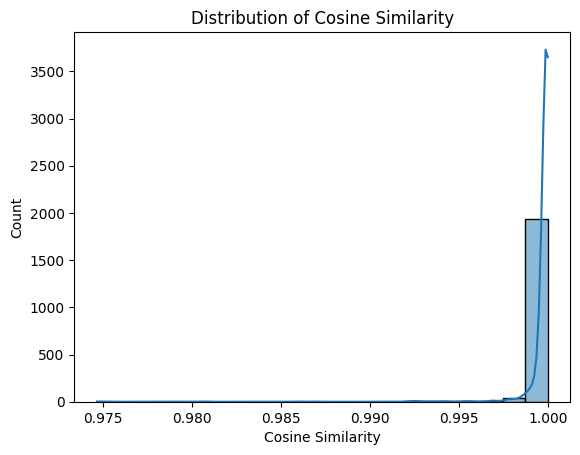

In [19]:
sns.histplot(df["cosine_similarity"], bins=20, kde=True)
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.show()
    

In [13]:

def stable_hash(x, length=8):
    return hashlib.md5(x.encode()).hexdigest()[:length]

df["p1_hash"] = df["protein1"].apply(stable_hash)
df["p2_hash"] = df["protein2"].apply(stable_hash)


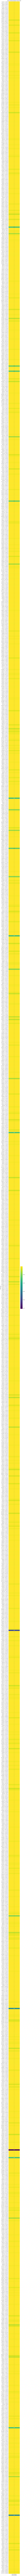

In [18]:
# Create row labels as "protein1 - protein2"
df["pair"] = df["p1_hash"] + " ↔ " + df["p2_hash"]

# Set index as pair
heatmap_df = df.set_index("pair")[["cosine_similarity"]]

# Create a vertical heatmap
plt.figure(figsize=(6, len(df) * 0.3))
sns.heatmap(heatmap_df, annot=True, cmap="viridis", cbar=True, linewidths=0.5)
plt.title("Cosine Similarity Between Protein Pairs")
plt.xlabel("Cosine Similarity")
plt.ylabel("Protein Pairs")
plt.tight_layout()
plt.show()

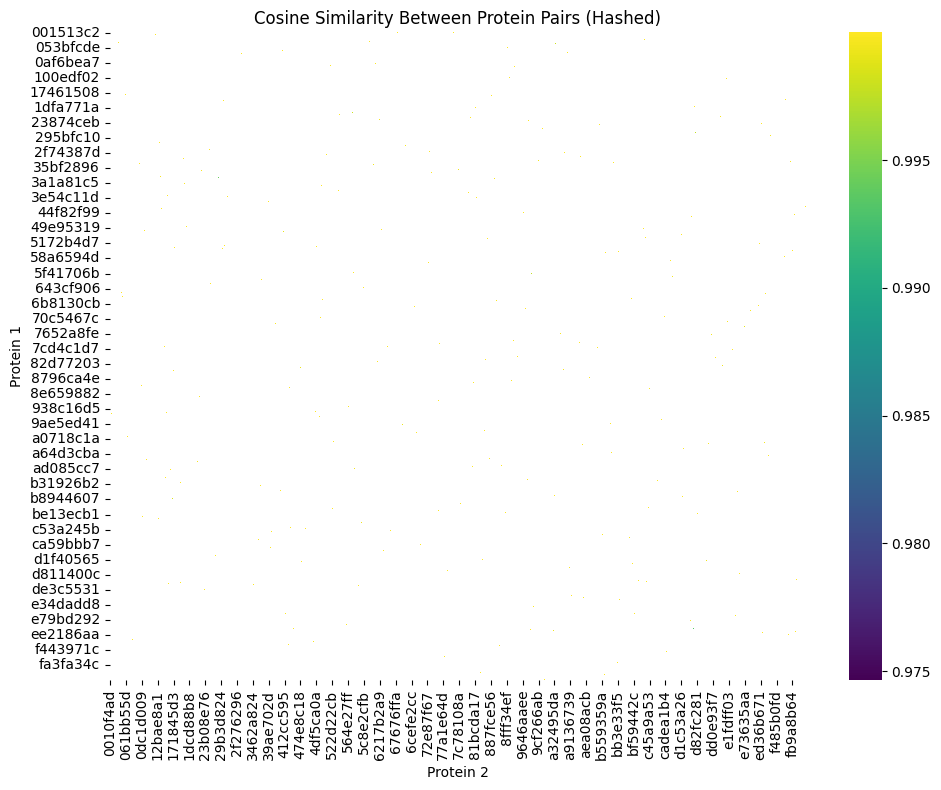

In [15]:

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="viridis", annot=False)
plt.title("Cosine Similarity Between Protein Pairs (Hashed)")
plt.xlabel("Protein 2")
plt.ylabel("Protein 1")
plt.tight_layout()
plt.show()

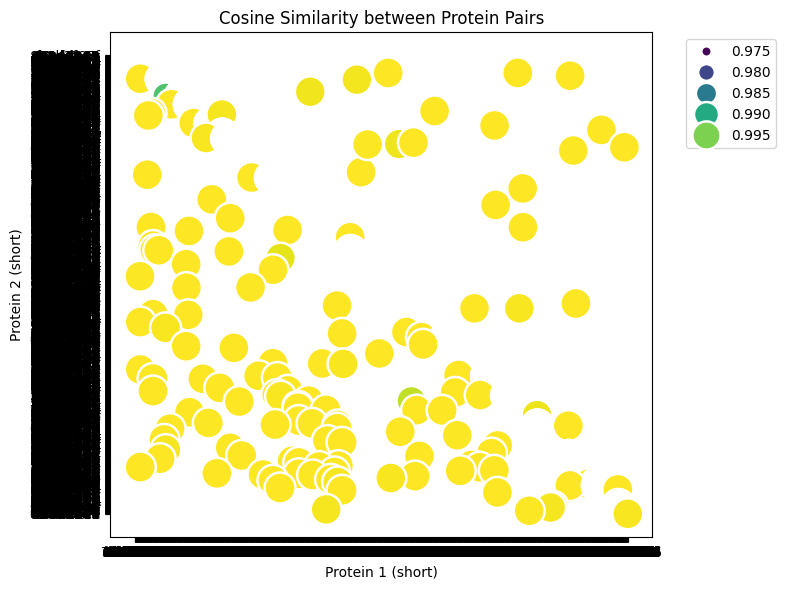

In [17]:
# Shorten protein names
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x="p1_hash", y="p2_hash", size="cosine_similarity", hue="cosine_similarity",
    sizes=(50, 500), palette="viridis", data=df, legend="brief"
)

# Label formatting
plt.xlabel("Protein 1 (short)")
plt.ylabel("Protein 2 (short)")
plt.title("Cosine Similarity between Protein Pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:

# Pivot to get protein1 vs protein2 matrix of similarity
pivot_df = df.pivot(index="p1_short", columns="p2_short", values="cosine_similarity")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Cosine Similarity Between Proteins")
plt.xlabel("Protein 2")
plt.ylabel("Protein 1")
plt.tight_layout()
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [10]:
df.groupby(["p1_short", "p2_short"]).size()

p1_short  p2_short
ASATWG    ASATWG      1
ASCRTP    ASCRTP      1
ASTKGP    ASTKGP      1
AVSNIP    SVSNIP      1
DCLGFM    DCLGFM      1
                     ..
MYSPYC    MYSPYC      1
SETAAE    SETAAE      1
SNKRKN    SNKRKN      1
VHLTDG    VHLTDG      1
YCQKWM    YCQKWM      1
Length: 1748, dtype: int64